In [1]:
''' SET UP '''

# math
import numpy as np
from pandas import DataFrame

# visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
plt.style.use("seaborn")
%matplotlib inline

# the actuall algorithm, documantation in SOM.py
from SOM import *

# random data-set generator more info in genData.py
from data import genData
seed = 637120124
genData.def_seed = seed

### trying the algorithm on a data-set of uniformaly distrabuted points on a 2 dimentional unit circle

In [2]:
data = genData.create_A1(4000, seed)
DataFrame([data[:, 0], data[:, 1]]).T.rename(columns = {0: 'x', 1:'y'})

,x,y
0,0.214807,0.582827
1,0.140951,0.688881
2,0.220231,0.387314
3,0.045678,0.444978
4,0.323191,0.776918
...,...,...
3995,0.466572,0.894610
3996,0.203545,0.529740
3997,0.386216,0.062814
3998,0.209436,0.325687


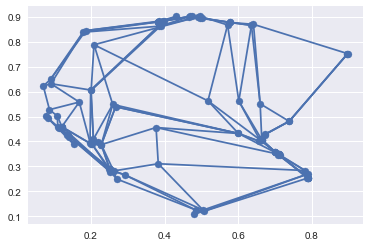


iteration: 4000



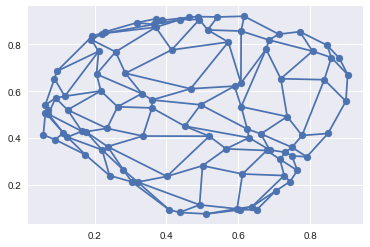


iteration: 8000



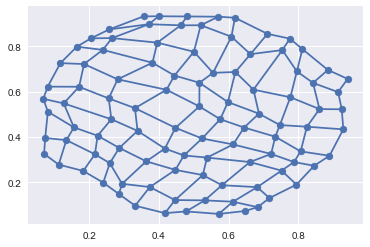


iteration: 12000



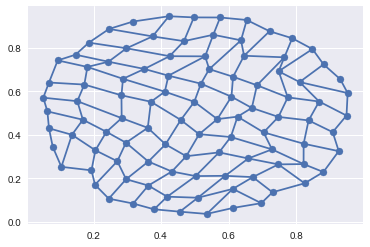


iteration: 16000



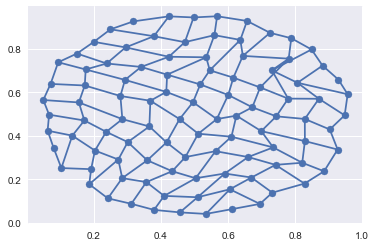


iteration: 20000



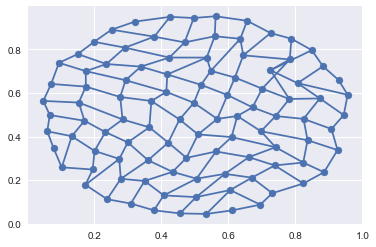


iteration: 24000



In [3]:
som = SOM((10, 10), 0.7, 2, np.zeros(2))
som.train(data, 0.001, 3)

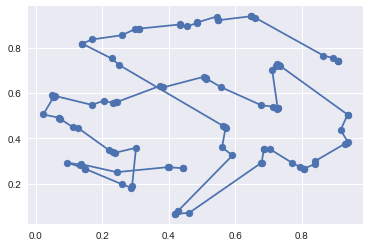


iteration: 4000



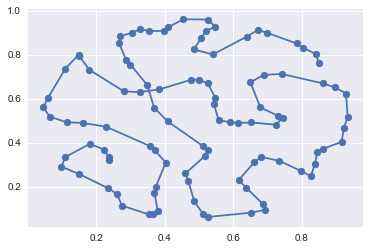


iteration: 8000



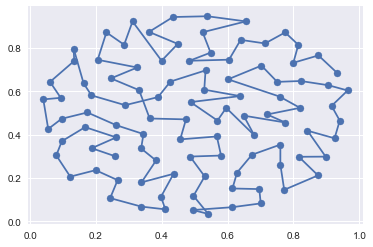


iteration: 12000



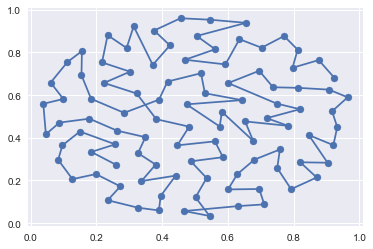


iteration: 16000



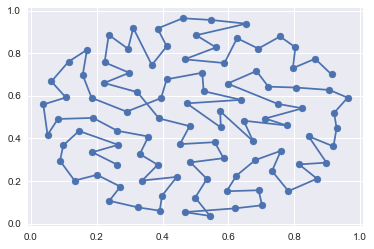


iteration: 20000



In [4]:
som = SOM((100,), 0.7, 2, np.zeros(2))
som.train(data, 0.001, 2)

### trying the algorithm on a data-set of NON-uniformaly distrabuted points on a 2 dimentional unit circle

In [5]:
data = genData.create_A2(4000, seed)
DataFrame([data[:, 0], data[:, 1]]).T.rename(columns = {0: 'x', 1:'y'})

,x,y
0,0.214807,0.582827
1,0.140951,0.688881
2,0.220231,0.387314
3,0.045678,0.444978
4,0.323191,0.776918
...,...,...
3995,0.466572,0.894610
3996,0.203545,0.529740
3997,0.386216,0.062814
3998,0.209436,0.325687


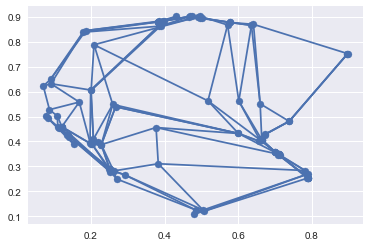


iteration: 4000



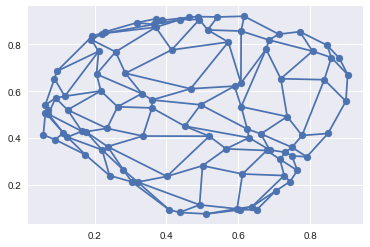


iteration: 8000



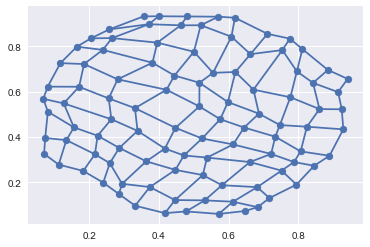


iteration: 12000



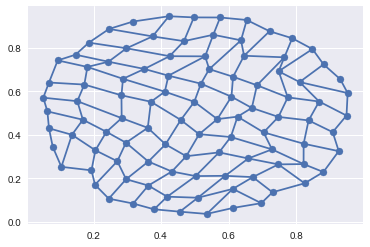


iteration: 16000



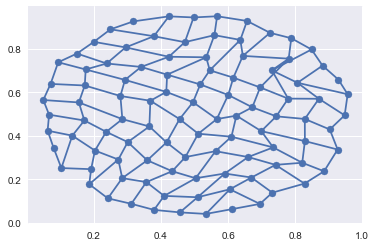


iteration: 20000



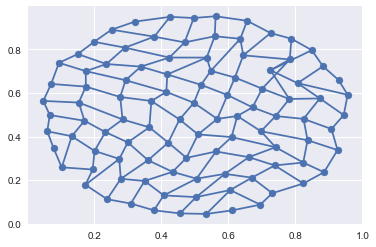


iteration: 24000



In [6]:
som = SOM((10, 10), 0.7, 2, np.zeros(2))
som.train(data, 0.001, 3)

### trying the algorithm on a data-set of uniformaly distrabuted points on a 2 dimentional ring.  this time the centroids have closed topology

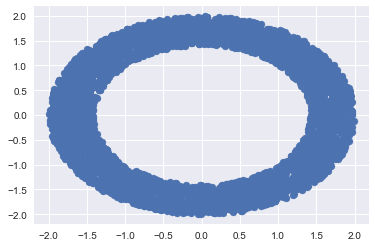

In [20]:
data = genData.create_A3(4000, seed)
DataFrame([data[:, 0], data[:, 1]]).T.rename(columns = {0: 'x', 1:'y'})

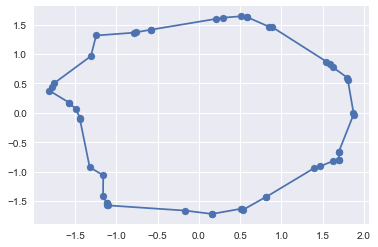


iteration: 4000



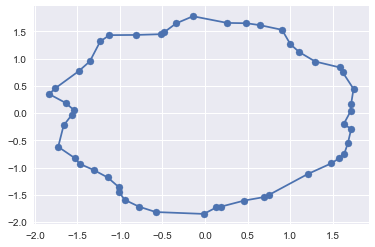


iteration: 8000



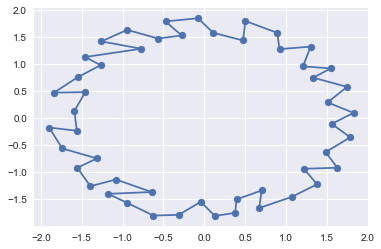


iteration: 12000



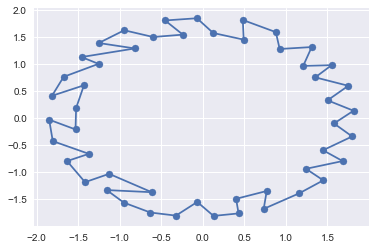


iteration: 16000



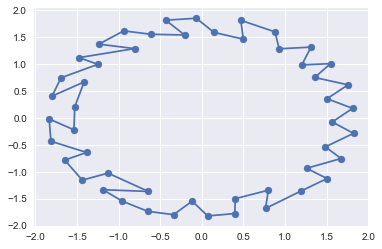


iteration: 20000



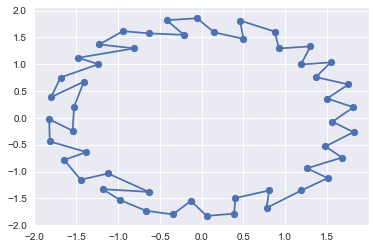


iteration: 24000



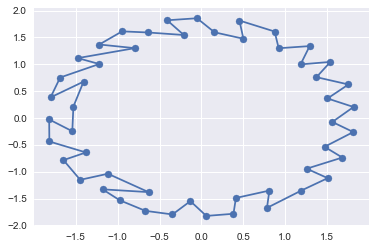


iteration: 28000



In [8]:
som = SOM((50,), 0.7, 2, np.zeros(2), True)
som.train(data, 0.003, 2)

## Part A2

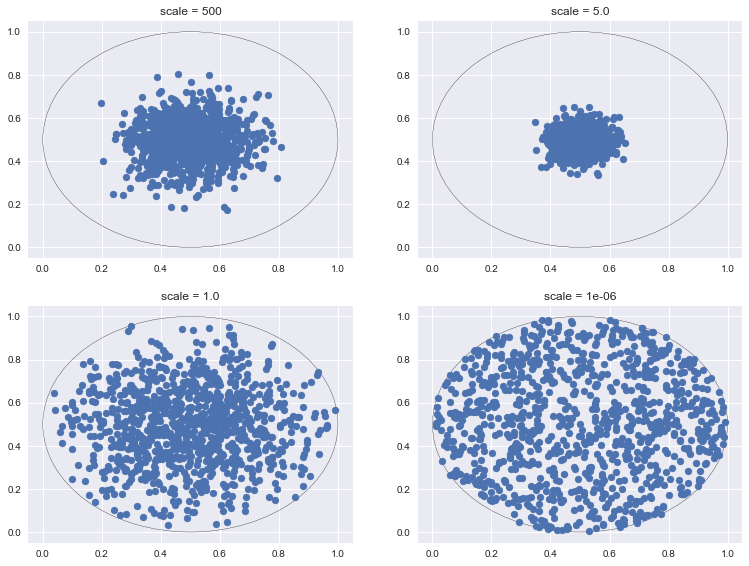

In [4]:

circle1 = plt.Circle((0.5,0.5),0.5,fill=False)
circle2 = plt.Circle((0.5,0.5),0.5,fill=False)
circle3 = plt.Circle((0.5,0.5),0.5,fill=False)
circle4 = plt.Circle((0.5,0.5),0.5,fill=False)
fig, axs = plt.subplots(2,2,figsize=(6.4*2,4.8*2)) 

dataA2 = genData.create_A2(size=1000,seed=seed,rng_type="normal",scale=0.1)
axs[0,0].add_patch(circle1)
axs[0,0].scatter(dataA2[:,0],dataA2[:,1])
axs[0,0].set_title("scale = "+str(0.1))


dataA2 = genData.create_A2(size=1000,seed=seed,rng_type="normal",scale=0.2)
axs[1,0].add_patch(circle2)
axs[1,0].scatter(dataA2[:,0],dataA2[:,1])
axs[1,0].set_title("scale = "+str(0.2))


dataA2 = genData.create_A2(size=1000,seed=seed,rng_type="normal",scale=0.05)
axs[0,1].add_patch(circle3)
axs[0,1].scatter(dataA2[:,0],dataA2[:,1])
axs[0,1].set_title("scale = "+str(0.05))


dataA2 = genData.create_A2(size=1000,seed=seed,rng_type="normal",scale=1)
axs[1,1].add_patch(circle4)
axs[1,1].scatter(dataA2[:,0],dataA2[:,1])
axs[1,1].set_title("scale = "+str(1))
plt.show()



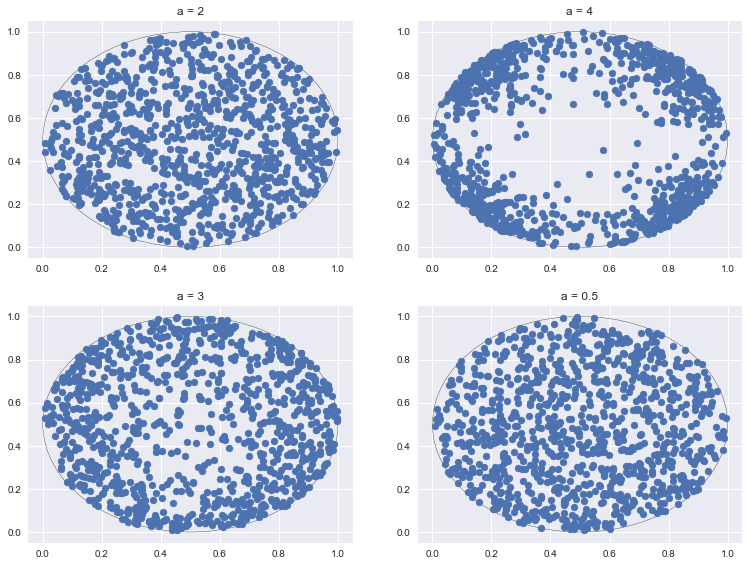

In [28]:
#using power distribution
circle1 = plt.Circle((0.5,0.5),0.5,fill=False)
circle2 = plt.Circle((0.5,0.5),0.5,fill=False)
circle3 = plt.Circle((0.5,0.5),0.5,fill=False)
circle4 = plt.Circle((0.5,0.5),0.5,fill=False)
fig, axs = plt.subplots(2,2,figsize=(6.4*2,4.8*2)) 

dataA2 = genData.create_A2(size=1000,seed=seed,rng_type="power",a=2)
axs[0,0].add_patch(circle1)
axs[0,0].scatter(dataA2[:,0],dataA2[:,1])
axs[0,0].set_title("a = "+str(2))


dataA2 = genData.create_A2(size=1000,seed=seed,rng_type="power",a=4)
axs[1,0].add_patch(circle2)
axs[1,0].scatter(dataA2[:,0],dataA2[:,1])
axs[1,0].set_title("a = "+str(4))


dataA2 = genData.create_A2(size=1000,seed=seed,rng_type="power",a=8)
axs[0,1].add_patch(circle3)
axs[0,1].scatter(dataA2[:,0],dataA2[:,1])
axs[0,1].set_title("a = "+str(8))


dataA2 = genData.create_A2(size=1000,seed=seed,rng_type="power",a=1)
axs[1,1].add_patch(circle4)
axs[1,1].scatter(dataA2[:,0],dataA2[:,1])
axs[1,1].set_title("a = "+str(1))
plt.show()

### challenging the algorithm to pick up on hand's structure

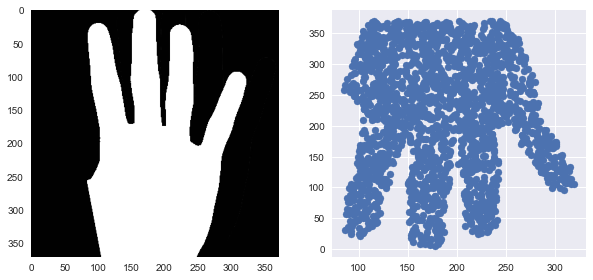

In [ ]:
data = genData.create_B(size = 2000,seed=seed, img = "data/hand1.png")
img = cv2.imread("data/hand1.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.grid(False)
plt.subplot(2,2,2)
plt.scatter(data[:,0], data[:,1])
plt.show()

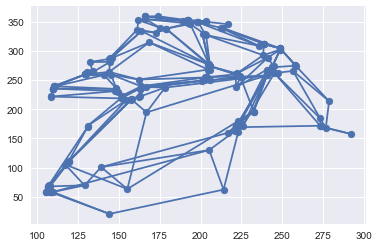


iteration: 2000



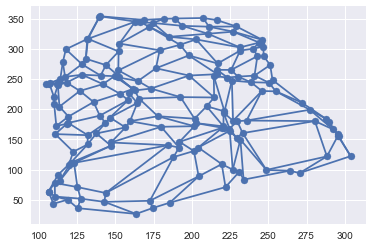


iteration: 4000



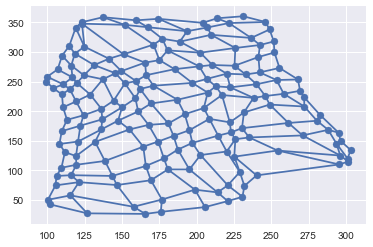


iteration: 6000



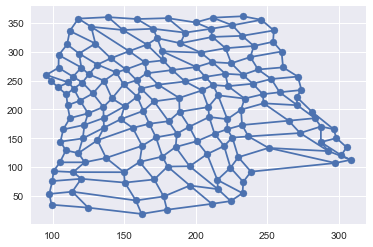


iteration: 8000



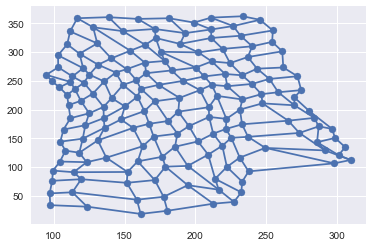


iteration: 10000



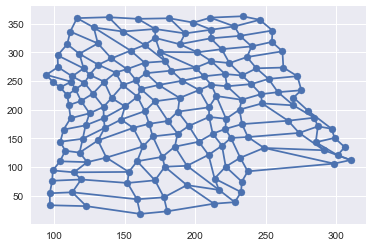


iteration: 12000



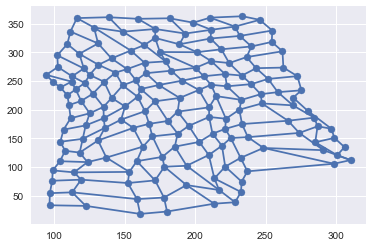


iteration: 14000



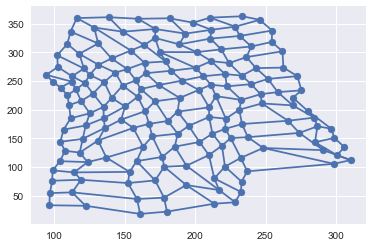


iteration: 16000



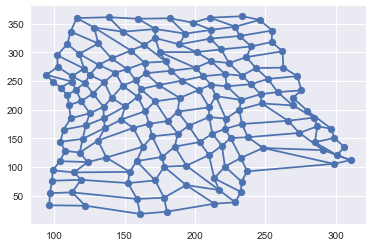


iteration: 18000



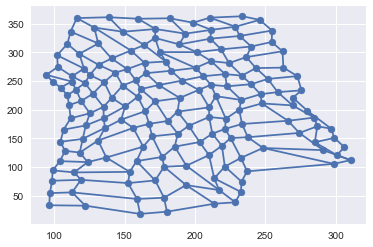


iteration: 20000



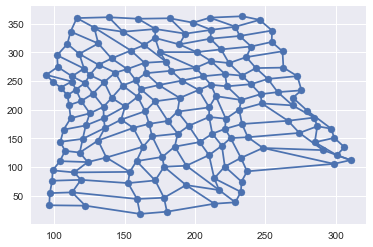


iteration: 22000



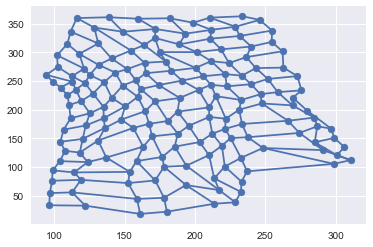


iteration: 24000



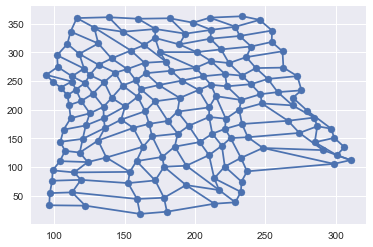


iteration: 26000



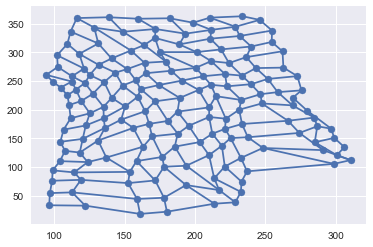


iteration: 28000



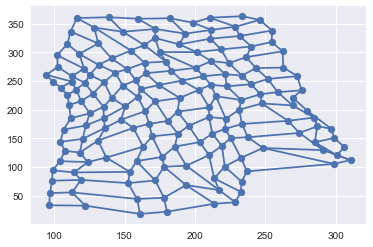


iteration: 30000



In [ ]:
som = SOM((13, 13), 0.7, 2, np.zeros(2))
som.train(data, 0.0005, 3)